In [2]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib notebook

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ¿Cuál es la diferencia de precios entre las propiedades emplazadas en el norte y sur de la capital federal ofertadas durante el año 2017?

In [11]:
props_2017 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2017.csv") 

In [12]:
props_2017.head(2)
print("Cantidad registros: "+str(_2017.count()['id']))

Cantidad registros: 421728


In [13]:
props_2017.dtypes

Unnamed: 0                      int64
id                             object
created_on                     object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
description                    object
title                          object
dtype: object

In [14]:
props_2017['created_on'] = pd.to_datetime(props_2017['created_on'],format='%Y-%m-%d')

In [17]:
props_2017.dtypes

Unnamed: 0                             int64
id                                    object
created_on                    datetime64[ns]
property_type                         object
place_name                            object
place_with_parent_names               object
country_name                          object
state_name                            object
geonames_id                          float64
lat-lon                               object
lat                                  float64
lon                                  float64
price                                float64
currency                              object
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_total_in_m2                  float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
floor                                float64
rooms                                float64
expenses  

In [18]:
props_2017 = props_2017[(props_2017['created_on'] >= '2017-01-01') & (props_2017['created_on'] <= '2017-08-31')]

In [19]:
props_2017.head(2)

,Unnamed: 0,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
24271,35364,e3cb52c36e2210586ddf90fd0443261ea2e5511f,2017-01-01,house,Quilmes,|Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...,Argentina,Bs.As. G.B.A. Zona Sur,3429651.0,"-34.744616,-58.277365",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corredor Responsable: Martin Veltri - C.M.Q 80...,Casa en Venta Quilmes
24272,35366,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,109000.0,NaN,43.0,NaN,2534.883721,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA


In [21]:
caba = props_2017[props_2017.state_name == 'Capital Federal']
caba.head(2)

,Unnamed: 0,id,created_on,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
24272,35366,2e61de575b2653733dc55aaed4b08a1e9ae13563,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,109000.0,NaN,43.0,NaN,2534.883721,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 AMBIENTES A ESTRENAR C/BALCÓN VILLA URQUIZA
24273,35367,5a66865f29a02dbfa89d04ad66e91162c368eb99,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.579461,-58.477982",...,89900.0,NaN,38.0,NaN,2365.789474,NaN,1.0,NaN,Corredor Responsable: Juan Carlos Treco - CUCI...,2 Ambientes / Monoambiente con balcon a estrenar


In [25]:
caba.groupby('property_type').count()
#Existen 4 tipos de propiedades: PH, apartamento, casa y local


,Unnamed: 0,id,created_on,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
property_type,,,,,,,,,,,,,,,,,,,,,
PH,7194,7194,7194,7194,7194,7194,7194,6927,6765,6765,...,6874,5167,6853,4818,6528,695,5648,635,7194,7194
apartment,91484,91484,91484,91484,91484,91484,91484,87445,76192,76192,...,83061,73925,87440,65734,79561,17712,66431,19139,91484,91484
house,8235,8235,8235,8235,8235,8235,8235,8000,6094,6094,...,7217,6246,7533,5322,6630,22,3266,64,8235,8235
store,4252,4252,4252,4252,4252,4252,4252,4059,3855,3855,...,3625,3284,3848,2679,3203,34,274,434,4252,4252


In [34]:
#assert caba.groupby(['surface_total_in_m2']).count()['id'] == caba.groupby(['surface_covered_in_m2']).count()['id']
caba.groupby(['surface_covered_in_m2']).count()['id']

#Removemos las propiedades que no tienen metraje
caba = caba[caba.surface_covered_in_m2 != 0]

In [37]:
caba = caba[caba.surface_total_in_m2 != 0]

In [43]:
# Nos quedamos con los registros dados de alta sólo durante el año 2017.
caba.created_on.head(2)
caba = caba[(caba.created_on >= '2017-01-01') & (caba.created_on <= '2017-08-31')]

In [48]:
#Para cada barrio teniendo en cuenta la frecuencia venta ordenamos descendentemente.
#Vamos a asignarle el número de comuna a la que corresponde cada barrio.
def set_comuna(place_name):
    p = str(place_name)
    if p == 'Retiro' or p == 'San Nicolás' or p == 'Puerto Madero' or p == 'San Telmo' or p == 'Monserrat' or p == 'Constitución':
        return 1
    if p == 'Recoleta':
        return 2
    if p == 'San Cristobal' or p == 'Balvanera':
        return 3
    if p == 'Boca' or p == 'Barracas' or p == 'Parque Patricios' or p == 'Pompeya':
        return 4
    if p == 'Almagro' or p == 'Boedo':
        return 5
    if p == 'Caballito':
        return 6
    if p == 'Flores' or p == 'Parque Chacabuco':
        return 7
    if p == 'Villa Soldati' or p == 'Villa Riachuelo' or p == 'Villa Lugano':
        return 8
    if p == 'Parque Avellaneda' or p == 'Liniers' or p == 'Mataderos':
        return 9
    if p == 'Villa Real' or p == 'Monte Castro' or p == 'Versalles' or p == 'Floresta' or p == 'Velez Sarsfield' or p == 'Villa Luro':
        return 10
    if p == 'Villa General Mitre' or p == 'Villa Devoto' or p == 'Villa del Parque' or p == 'Villa Santa Rita':
        return 11
    if p == 'Coghlan' or p == 'Saavedra' or p == 'Villa Urquiza' or p == 'Villa Pueyrredón':
        return 12
    if p == 'Belgrano' or p == 'Nuñez' or p == 'Colegiales':
        return 13
    if p == 'Palermo' or p == 'Palermo Hollywood' or p == 'Palermo Soho' or p == 'Palermo Chico' or p == 'Palermo Viejo':
        return 14
    if p == 'Chacarita' or p == 'Agronomía' or p == 'Villa Crespo' or p =='Villa Ortuzar':
        return 15

In [49]:
caba['comuna'] = caba['place_name'].apply(set_comuna)

In [51]:
b_sur = caba[(caba['comuna'] > 0) & (caba['comuna'] <= 9) & (caba['comuna'] != 2) & (caba['comuna'] != 6)]

b_norte = caba[(caba['comuna'] >= 10) | (caba['comuna'] == 2) | (caba['comuna'] == 6)] 

In [69]:
#Analizamos sólo las unidades del tipo departamento
b_sur_apart = b_sur[b_sur.property_type == 'apartment']
rs = b_sur_apart.groupby(['comuna']).mean()['price_usd_per_m2']
rs = rs.reset_index()
rs

,comuna,price_usd_per_m2
0,1.0,3218.687220
1,3.0,6191.011822
2,4.0,2208.959563
3,5.0,7541.303304
4,7.0,2163.721721
5,8.0,1297.409219
6,9.0,1968.549403


In [68]:
b_norte_apart = b_norte[b_norte.property_type == 'apartment']
rn = b_norte_apart.groupby(['comuna']).mean()['price_usd_per_m2']
rn = rn.reset_index()
rn

,comuna,price_usd_per_m2
0,2.0,3341.005981
1,6.0,2565.632499
2,10.0,2009.520323
3,11.0,2235.133472
4,12.0,2579.914422
5,13.0,2991.435569
6,14.0,3360.327853
7,15.0,2387.329703


<IPython.core.display.Javascript object>


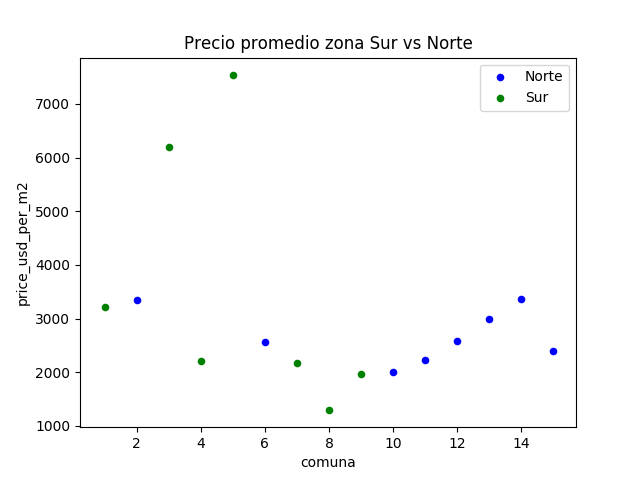

In [238]:
ax = rn.plot.scatter(x='comuna',y='price_usd_per_m2',color='blue',label='Norte')
rs.plot.scatter(x='comuna', y='price_usd_per_m2', color='green', label='Sur', ax=ax,title="Precio promedio zona Sur vs Norte")

In [ ]:
#Se puede ver cómo el promedio de precios de las propiedades del Norte son mayores que el promedio
#correspondiente a la zona Sur

In [ ]:
#Vemos el caso raro de las propiedades correspondientes a la comuna 3 y 5,
#las cuales tienen promedios muy superiores

In [96]:
b_sur_apart.price_usd_per_m2.mean()

4541.9281449033851

In [92]:
print("Cantidad de registros: "+str(b_sur['price_usd_per_m2'].count()))
#b_sur[b_sur['price_usd_per_m2'].isNull()]
#b_sur[b_sur.isnull.any()]
#b_sur.isnull().any()


Cantidad de registros: 24874


In [112]:
#Sacamos las propiedades que no tienen precio
b_sur_apart = b_sur_apart[b_sur_apart.price_usd_per_m2.notnull()]

b_norte_apart = b_norte_apart[b_norte_apart.price_usd_per_m2.notnull()]

In [114]:
b_sur_apart = b_sur[b_sur.property_type == 'apartment']
rs = b_sur_apart.groupby(['comuna']).mean()['price_usd_per_m2']
rs = rs.reset_index()
print("Precio promedio por comuna zona Sur")
rs

Precio promedio por comuna zona Sur


,comuna,price_usd_per_m2
0,1.0,3218.687220
1,3.0,6191.011822
2,4.0,2208.959563
3,5.0,7541.303304
4,7.0,2163.721721
5,8.0,1297.409219
6,9.0,1968.549403


In [115]:
print("Precio promedio por comuna zona Norte")
b_norte_apart = b_norte[b_norte.property_type == 'apartment']
rn = b_norte_apart.groupby(['comuna']).mean()['price_usd_per_m2']
rn = rn.reset_index()
rn

Precio promedio por comuna zona Norte


,comuna,price_usd_per_m2
0,2.0,3341.005981
1,6.0,2565.632499
2,10.0,2009.520323
3,11.0,2235.133472
4,12.0,2579.914422
5,13.0,2991.435569
6,14.0,3360.327853
7,15.0,2387.329703


<IPython.core.display.Javascript object>


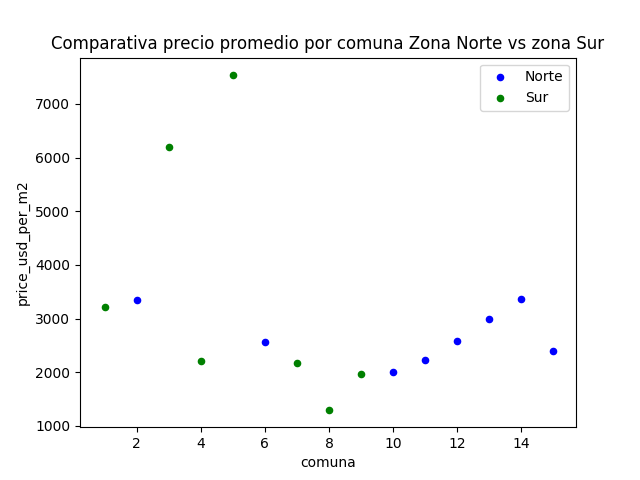

In [239]:
ax = rn.plot.scatter(x='comuna',y='price_usd_per_m2',color='blue',label='Norte')
rs.plot.scatter(x='comuna', y='price_usd_per_m2', color='green', label='Sur', ax=ax,\
                title="Comparativa precio promedio por comuna Zona Norte vs zona Sur")

In [ ]:
#Con los datos filtrados por aquellos que sí tienen precio en dólares por metro cuadrado encontramos
#en lineas generales que el promedio del precio de venta en dólares es mayor en la zona Norte que
#en la zona Sur.
#Hay un caso curioso(a investigar) por el cual en la zona Sur para la comuna 3 y 5 se tiene
#un precio muy elevado al promedio.

# ¿Cómo fue la evolución de los microdepartamentos(18 ~30 m2) en los últimos años?

In [131]:
#props_2016 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2016.csv")
#props_2015 = pd.read_csv("../../home/lucas/academico/datos/tp1/props_2015.csv")

In [169]:
#Busquemos los microdepartamentos para los próximos 3 años
p17_micro = props_2017[(props_2017.property_type == 'apartment') & (props_2017.surface_total_in_m2 <= 30) & (props_2017.surface_covered_in_m2 <= 30)]
micro17 = p17_micro[(p17_micro.surface_total_in_m2.notnull()) & (p17_micro.surface_covered_in_m2.notnull()) & (p17_micro.surface_total_in_m2 > 0) & (p17_micro.surface_covered_in_m2 > 0)]

In [170]:
#Busquemos los microdepartamentos para los próximos 3 años
p16_micro = props_2016[(props_2016.property_type == 'apartment') & (props_2016.surface_total_in_m2 <= 30) & (props_2016.surface_covered_in_m2 <= 30)]
micro16 = p16_micro[(p16_micro.surface_total_in_m2.notnull()) & (p16_micro.surface_covered_in_m2.notnull()) & (p16_micro.surface_total_in_m2 > 0) & (p16_micro.surface_covered_in_m2 > 0)]

In [171]:
#Busquemos los microdepartamentos para los próximos 3 años
p15_micro = props_2015[(props_2015.property_type == 'apartment') & (props_2015.surface_total_in_m2 <= 30) & (props_2015.surface_covered_in_m2 <= 30)]
micro15 = p15_micro[(p15_micro.surface_total_in_m2.notnull()) & (p15_micro.surface_covered_in_m2.notnull()) & (p15_micro.surface_total_in_m2 > 0) & (p15_micro.surface_covered_in_m2 > 0)]

In [186]:
micro17 = micro17[micro17.price_usd_per_m2.notnull()]
micro16 = micro16[micro16.price_usd_per_m2.notnull()]
micro15 = micro15[micro15.price_usd_per_m2.notnull()]

In [187]:
#Filtramos las fechas de creación para cada 1 de los casos
micro17 = micro17[(micro17.created_on >= '2017-01-01') & (micro17.created_on <= '2017-08-31')]

#Filtramos las fechas de creación para cada 1 de los casos
micro16 = micro16[(micro16.created_on >= '2016-01-01') & (micro16.created_on <= '2016-12-31')]

#Filtramos las fechas de creación para cada 1 de los casos
micro15 = micro15[(micro15.created_on >= '2015-01-01') & (micro15.created_on <= '2015-12-31')]

In [188]:
mf = [micro15,micro16,micro17]

In [189]:
micro3 = pd.concat(mf)

<IPython.core.display.Javascript object>


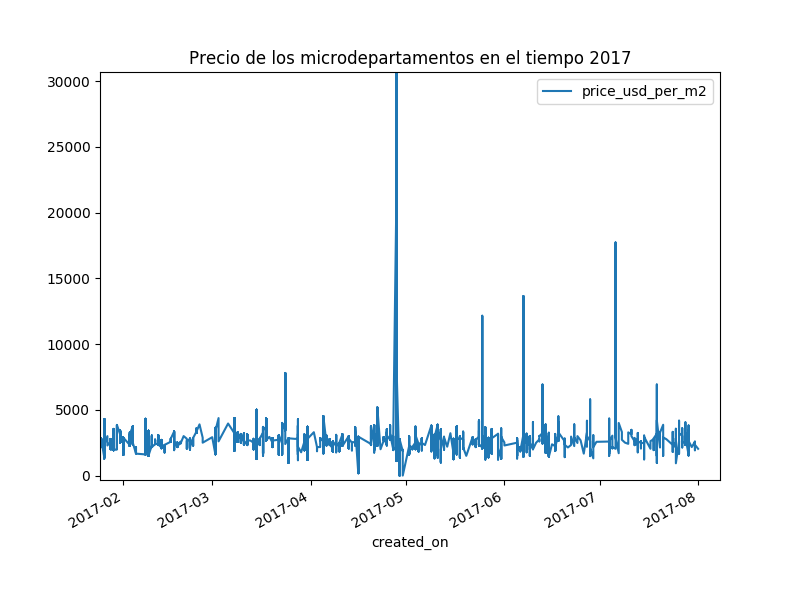

In [241]:
micro17.plot(x='created_on',y='price_usd_per_m2',title="Precio de los microdepartamentos en el tiempo 2017",figsize=(8,6))

<IPython.core.display.Javascript object>


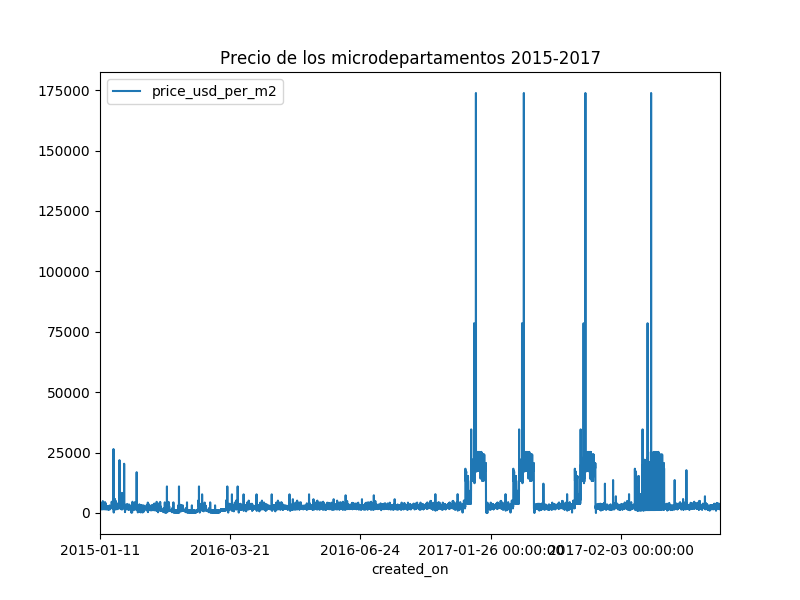

In [242]:
micro3.plot(x='created_on',y='price_usd_per_m2',title="Precio de los microdepartamentos 2015-2017",figsize=(8, 6)\
           ,)

In [ ]:
#Se puede ver en el gráfico, salvando casos raros, donde el precio se dispara, desde el precio de los
#microdepartamentos fue aumentando.

In [225]:
r17 = micro17[['created_on','price_usd_per_m2']]
r16 = micro16[['created_on','price_usd_per_m2']]
r15 = micro15[['created_on','price_usd_per_m2']]

In [ ]:
rs = b_sur_apart.groupby(['comuna']).mean()['price_usd_per_m2']
rs = rs.reset_index()
#print("Precio promedio por comuna zona Sur")
rs

In [233]:
#Queda ver la posibilidad de realizar otro gráfico para ver mejor la evolución de los precios en el tiempo
#para los microdepartamentos.

In [229]:
#r17['created_on_n'] = r17['created_on'].apply(pd.to_numeric)
#r17.head(15)

In [230]:
#r16['created_on_n'] = r16['created_on'].apply(pd.to_numeric)
#r16.head(15)

In [232]:
#r17.head(2)

In [231]:
#ax = r17.plot.scatter(x='created_on_n',y='price_usd_per_m2',color='red',label='2017')
#rs.plot.scatter(x='created_on_n', y='price_usd_per_m2', color='green', label='2016', ax=ax,\
#                title="")